# 필기체를 구분하는 분류 ANN 구현

In [1]:
from keras import layers, models

Using TensorFlow backend.


In [2]:
# 분산 방식 모델링을 포함하는 함수형 구현

def ANN_models_func(Nin,Nh,Nout):
    x = layers.Input(shape = (Nin,))
    h = layers.Activation('relu')(layers.Dense(Nh)(x))
    y = layers.Activation('softmax')(layers.Dense(Nout)(h))
    model = models.Model(x,y)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    return model

In [3]:
# 연쇄 방식 모델링을 포함하는 함수형 구현

def ANN_seq_func(Nin,Nh,Nout):
    model = models.Sequential()
    model.add(layers.Dense(Nh,activation = 'relu', input_shape = (Nin,)))
    model.add(layers.Dense(Nout, activation = 'softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    return model

In [4]:
# 분산 방식 모델링을 포함하는 객체지향형 구현

class ANN_models_class(models.Model):
    def __init__(self,Nin,Nh,Nout):
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')
        softmax = layers.Activation('softmax')
        
        x = layers.Input(shape = (Nin,))
        h = relu(hidden(x))
        y = softmax(output(h))
        
        super().__init__(x,y)
        self.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [5]:
# 연쇄 방식 모델링을 포함하는 객체지향형 구현

class ANN_seq_class(models.Sequential):
    def __init__(self,Nin,Nh,Nout):
        super().__init__()
        self.add(layers.Dense(Nh, activation='relu', input_shape = (Nin,)))
        self.add(layers.Dense(Nout, activation ='softmax'))
        self.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [6]:
# 분류 ANN에 사용할 데이터 불러오기

import numpy as np
from keras import datasets
from keras.utils import np_utils  # to_categorical

def Data_func():
    (x_train, y_train), (x_test,y_test) = datasets.mnist.load_data()
    # 0 ~ 9 숫자로 이루어진 출력값을 0과 1로 표현하는 벡터 10개로 바꾸기 -> 이진 벡터로 출력변수를 구성하는 것이 효율적
    y_train =  np_utils.to_categorical(y_train)  
    y_test =  np_utils.to_categorical(y_test)
    
    L,W,H = x_train.shape
    x_train = x_train.reshape(-1,W*H)
    x_test = x_test.reshape(-1,W*H)
    
    x_train = x_train / 255.0
    x_test = x_test / 255.0
    
    return (x_train,y_train), (x_test,y_test)

In [7]:
# 분류 ANN 학습 결과 그래프 구현

import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'])   # 실제 데이터로 구한 손실 값
    plt.plot(history.history['val_loss'])  # 검증 데이터로 구한 손실 값
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Test'], loc = 0)

def plot_acc(history):
    plt.plot(history.history['acc'])   # 실제 데이터로 구한 정확도
    plt.plot(history.history['val_acc'])  # 검증 데이터로 구한 정확도
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Test'], loc = 0)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 1s 30us/step - loss: 0.3917 - accuracy: 0.8917 - val_loss: 0.2113 - val_accuracy: 0.9414
Epoch 2/15
48000/48000 [==============================] - 2s 33us/step - loss: 0.1834 - accuracy: 0.9474 - val_loss: 0.1565 - val_accuracy: 0.9551
Epoch 3/15
48000/48000 [==============================] - 2s 39us/step - loss: 0.1328 - accuracy: 0.9619 - val_loss: 0.1321 - val_accuracy: 0.9638
Epoch 4/15
48000/48000 [==============================] - 2s 38us/step - loss: 0.1045 - accuracy: 0.9701 - val_loss: 0.1159 - val_accuracy: 0.9665
Epoch 5/15
48000/48000 [==============================] - 2s 33us/step - loss: 0.0857 - accuracy: 0.9749 - val_loss: 0.1048 - val_accuracy: 0.9694
Epoch 6/15
48000/48000 [==============================] - 2s 32us/step - loss: 0.0720 - accuracy: 0.9795 - val_loss: 0.1014 - val_accuracy: 0.9692
Epoch 7/15
48000/48000 [==============================] - 2s 32us/st

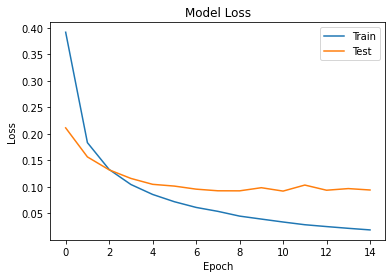

KeyError: 'acc'

In [8]:
# 분류 ANN 학습 및 성능 분석

def main() :
    Nin = 784   
    Nh = 100
    number_of_class = 10
    Nout = number_of_class
    
    model = ANN_seq_class(Nin,Nh,Nout)
    (x_train,y_train), (x_test,y_test) = Data_func()
    
    # training
    history = model.fit(x_train,y_train,epochs = 15, batch_size = 100, validation_split = 0.2)
    performance_test = model.evaluate(x_test,y_test,batch_size = 100)
    print('Test Loss and Accuracy ->', performance_test)
    
    plot_loss(history)
    plt.show()
    plot_acc(history)
    plt.show()
    
if __name__ == '__main__':
    main()

# 시계열 데이터를 예측하는 회귀 ANN

In [9]:
# 회귀 ANN 모델링

from keras import layers,models

class ANN(models.Model):
    def __init__(self,Nin,Nh,Nout):
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')
        
        x = layers.Input(shape=(Nin,))
        h = relu(hidden(x))
        y = output(h)
        
        super().__init__(x,y)
        
        self.compile(loss = 'mse', optimizer = 'sgd')

In [10]:
# 학습과 평가용 데이터 불러오기

from keras import datasets
from sklearn import preprocessing

def Data_func():
    (x_train,y_train),(x_test,y_test) = datasets.boston_housing.load_data()
    scaler = preprocessing.MinMaxScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    return (x_train,y_train),(x_test,y_test)

In [11]:
# 회귀 ANN 학습 결과 그래프 구현

import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'])   # 실제 데이터로 구한 손실 값
    plt.plot(history.history['val_loss'])  # 검증 데이터로 구한 손실 값
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Test'], loc = 0)


Train on 323 samples, validate on 81 samples
Epoch 1/100
 - 0s - loss: 445.8442 - val_loss: 121.2620
Epoch 2/100
 - 0s - loss: 118.7547 - val_loss: 147.7085
Epoch 3/100
 - 0s - loss: 107.1435 - val_loss: 77.5516
Epoch 4/100
 - 0s - loss: 72.3522 - val_loss: 75.1730
Epoch 5/100
 - 0s - loss: 72.0868 - val_loss: 58.0545
Epoch 6/100
 - 0s - loss: 51.2498 - val_loss: 64.0678
Epoch 7/100
 - 0s - loss: 53.9615 - val_loss: 53.2296
Epoch 8/100
 - 0s - loss: 45.1410 - val_loss: 47.3747
Epoch 9/100
 - 0s - loss: 43.9891 - val_loss: 68.0251
Epoch 10/100
 - 0s - loss: 62.8416 - val_loss: 89.7429
Epoch 11/100
 - 0s - loss: 58.0296 - val_loss: 45.3152
Epoch 12/100
 - 0s - loss: 41.4955 - val_loss: 44.1458
Epoch 13/100
 - 0s - loss: 36.0089 - val_loss: 54.4447
Epoch 14/100
 - 0s - loss: 39.1397 - val_loss: 39.7691
Epoch 15/100
 - 0s - loss: 44.6338 - val_loss: 33.9434
Epoch 16/100
 - 0s - loss: 32.9775 - val_loss: 36.8403
Epoch 17/100
 - 0s - loss: 32.6463 - val_loss: 31.2912
Epoch 18/100
 - 0s - los

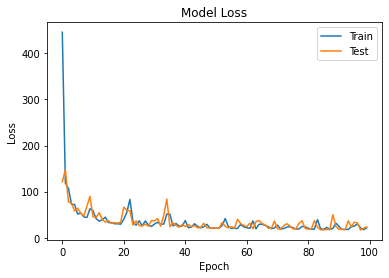

In [12]:
# 회귀 ANN 학습 및 성능 분석

def main():
    Nin = 13
    Nh = 5
    Nout = 1

    model = ANN(Nin, Nh, Nout)
    (x_train, y_train), (x_test, y_test) = Data_func()

    history = model.fit(x_train, y_train, epochs=100, batch_size=100, validation_split=0.2, verbose=2)

    performace_test = model.evaluate(x_test, y_test, batch_size=100)
    print('\nTest Loss -> {:.2f}'.format(performace_test))

    plot_loss(history)
    plt.show()


if __name__ == '__main__':
    main()